In [1]:
#!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt

#excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)

In [2]:
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [3]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)    # 전출지별 열 삭제
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)        # 전입지 열을 인덱스로 설정 

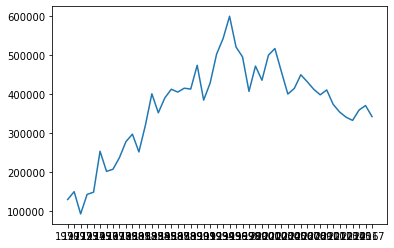

In [4]:
sr_one =df_seoul.loc['경기도']
# 그래프구현 방법1(x,y축 데이터 선택)
plt.plot(sr_one.index, sr_one.values)

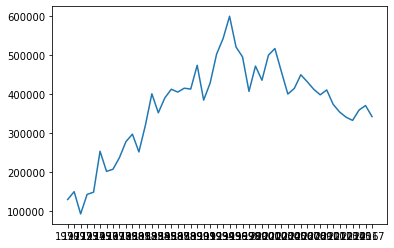

In [5]:
# 그래프구현 방법2(데이터프레임 객체를 plot()함수에 직접 입력)
plt.plot(sr_one)

## 차트 제목, 축 이름 추가

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from c

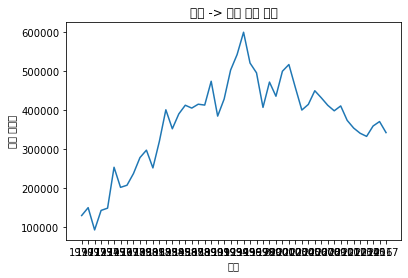

In [6]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index,sr_one.values) # 이거나 plt.plot(sr_one)도 가능!!

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 변경사항 저장 후 그래프 출력
plt.show()

## Matplotlib 한글 폰트 오류 해결

In [7]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" # 폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 또는 윈도우 설치 폴더에서 사용할 한글 폰트를 찾아서 파일 경로를 
# font_path에 할당하는 방법도 가능 ex) font_path = "c:/Windows/Fonts/malgun,ttf")

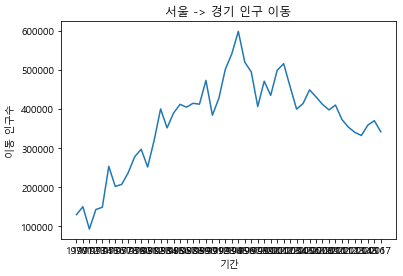

In [8]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index,sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 변경사항 저장 후 그래프 출력
plt.show()

## 그래프 꾸미기

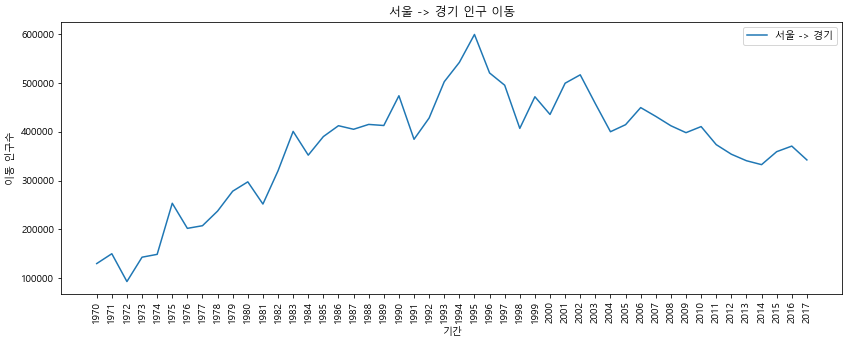

In [9]:
# 눈금 라벨의 글씨가 서로 겹쳐 잘 보이지 않는 문제를 해결하는 방법 

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical') # 또는 rotation=90

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') # 차트 제목
plt.xlabel('기간')                  # x축 이름
plt.ylabel('이동 인구수')           # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')  # 범례 표시, loc='best'는 적절한 여백에다 위치하라는 뜻

plt.show()   # 변경사항 저장 후 그래프로 출력

## 스타일 서식 지정

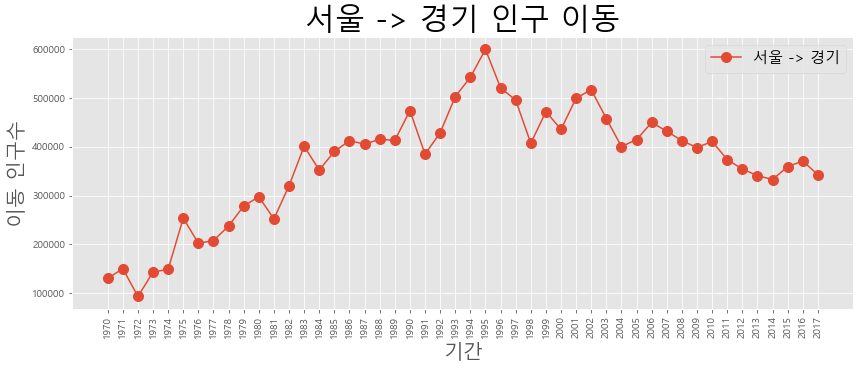

In [10]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index,sr_one.values, marker='o',markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30) # 차트 제목
plt.xlabel('기간', size=20)                  # x축 이름
plt.ylabel('이동 인구수', size=20)           # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)   # 범례 표시, 
                                    # loc='best'는 적절한 여백으로 설정

plt.show()

## matplotlib 스타일 리스트 출력 - 설명을 덧붙이는 주석

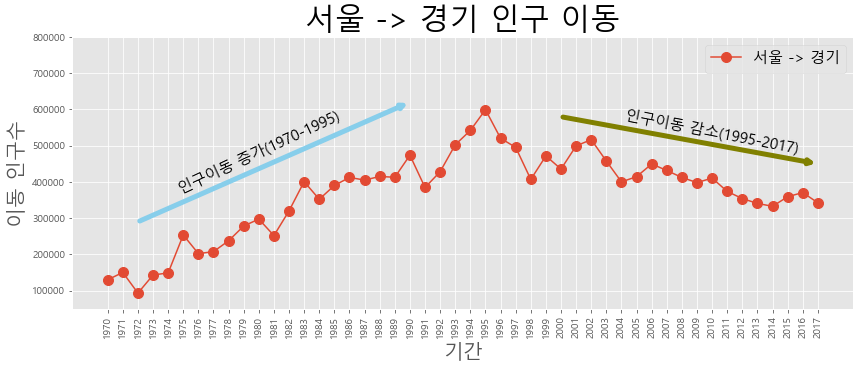

In [11]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그림 사이즈 늘리기
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

#범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)


# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 370000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 480000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.show()  # 변경사항 저장하고 그래프 출력


<ipython-input-12-d35263220b76>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-12-d35263220b76>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=60)


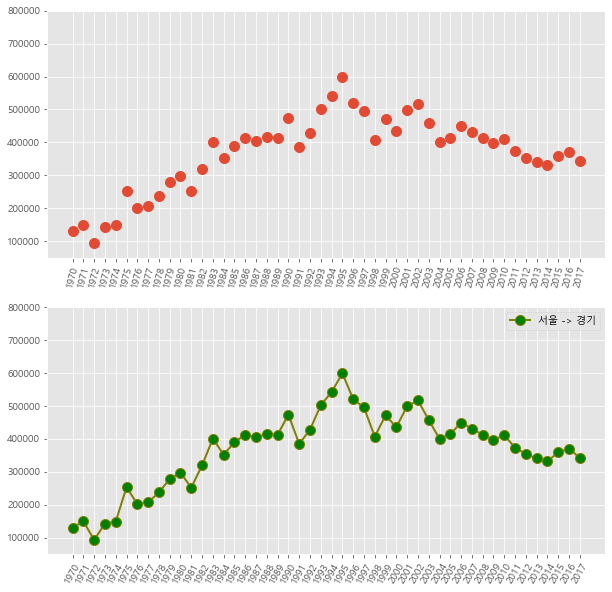

In [12]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize = 10)
ax2.plot(sr_one, marker= 'o', markerfacecolor='green', markersize = 10,
        color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=60)

plt.show() # 변경사항 저장 및 쓸데없는 내용 제거

<ipython-input-13-9ce9f37c1956>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index,rotation = 75)


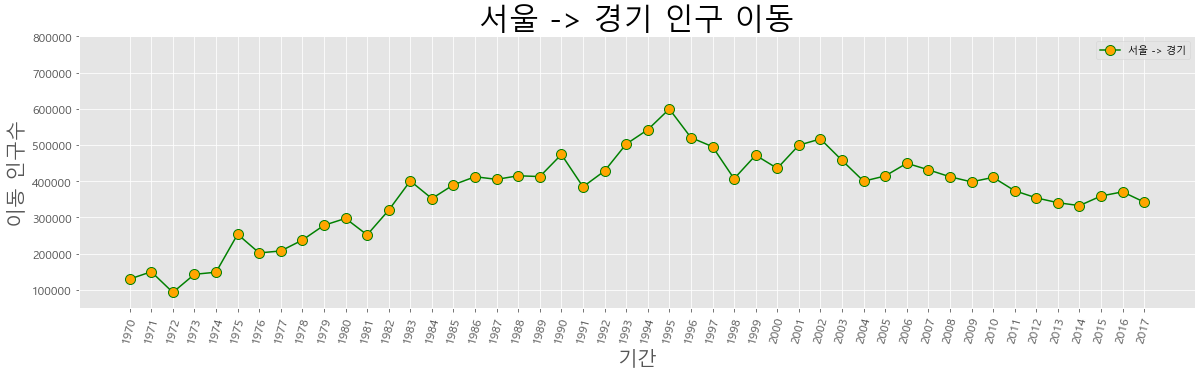

In [13]:
# 그래프 객체 생성(figure에 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker = 'o', markerfacecolor = 'orange', color = 'g', markersize=10)
ax.legend(labels = ['서울 -> 경기'],loc='best')

ax.set_ylim(50000, 800000)
# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size= 30)

# 축 이름 추가
ax.set_xlabel('기간', size = 20)
ax.set_ylabel('이동 인구수', size = 20)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index,rotation = 75)

# 축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()

<ipython-input-20-b484f07c0851>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


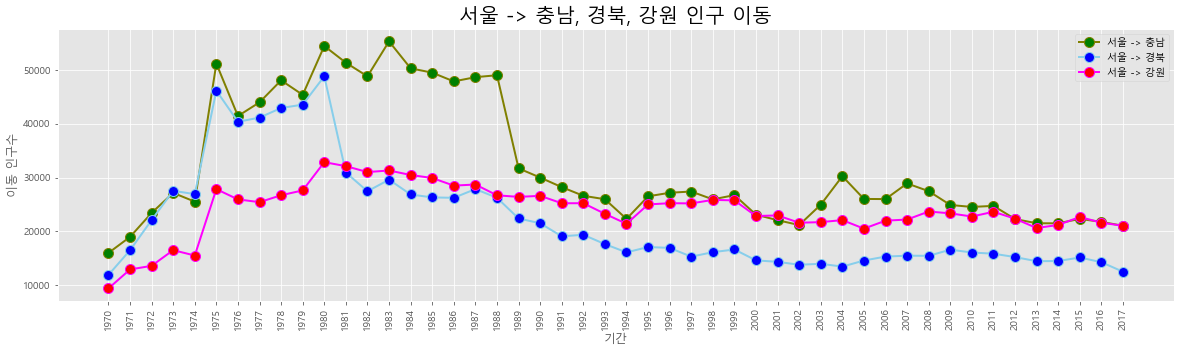

In [20]:


# 서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력